<a href="https://colab.research.google.com/github/toan27062002/do_an_hk2/blob/main/inference_statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy  
from scipy import stats

In [283]:
# nhập dữ liệu 
data = pd.read_csv("Diet_R.csv")
data 

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [284]:
# Xem thông tin dữ liệu trong dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        78 non-null     object 
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.4+ KB


In [285]:
# xóa bỏ hàng chứa ô thiếu dữ liệu  
rm = data.drop([0, 1])
rm

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [286]:
# sắp xếp lại vị trí dữ liệu   
t = rm.set_index('Person')
new_data = t.sort_index()
new_data

,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2
...,...,...,...,...,...,...
74,1,35,183,83,3,80.2
75,1,49,177,84,3,79.9
76,1,28,164,85,3,79.7


## **Task 1: Ignore diet and test to see if weight has been lostlost**

## **Task 2: Remove weight lost and get students to calculate it using before/after weights**

In [287]:
# tính cân nặng thay đổi  
weightLOST = data_new['pre.weight'] - data_new['weight6weeks']
weightLOST

Person
1     3.8
2     6.0
3     0.7
4     2.9
5     2.8
     ... 
74    2.8
75    4.1
76    5.3
77    9.2
78    6.1
Length: 76, dtype: float64

In [288]:
# Thêm cột dữ liệu weightLOSTweightLOST(cân nặng thay đổiđổi) vào new_data  
pop = new_data.pop('pre.weight')
new_data.insert(4, "pre.weight", pop)
new_data.insert(6, 'weightLOST', weightLOST) 
new_data

,gender,Age,Height,Diet,pre.weight,weight6weeks,weightLOST
Person,,,,,,,
1,0,22,159,1,58,54.2,3.8
2,0,46,192,1,60,54.0,6.0
3,0,55,170,1,64,63.3,0.7
4,0,33,171,1,64,61.1,2.9
5,0,50,170,1,65,62.2,2.8
...,...,...,...,...,...,...,...
74,1,35,183,3,83,80.2,2.8
75,1,49,177,3,84,79.9,4.1
76,1,28,164,3,85,79.7,5.3


In [289]:
# Nếu weightLOST > 0 => giảm cân 
# Nếu weightLOST = 0 => không có hiệu quả
# Nếu weightLOST < 0 => tăng cân 
lost_weight_success = new_data[new_data['weightLOST'] > 0]
lost_weight_success

,gender,Age,Height,Diet,pre.weight,weight6weeks,weightLOST
Person,,,,,,,
1,0,22,159,1,58,54.2,3.8
2,0,46,192,1,60,54.0,6.0
3,0,55,170,1,64,63.3,0.7
4,0,33,171,1,64,61.1,2.9
5,0,50,170,1,65,62.2,2.8
...,...,...,...,...,...,...,...
74,1,35,183,3,83,80.2,2.8
75,1,49,177,3,84,79.9,4.1
76,1,28,164,3,85,79.7,5.3


In [290]:
lost_weight_fail = new_data[new_data['weightLOST'] < 0]
lost_weight_fail

,gender,Age,Height,Diet,pre.weight,weight6weeks,weightLOST
Person,,,,,,,
15,1,39,168,1,71,71.6,-0.6
27,0,44,174,2,58,60.1,-2.1
40,0,29,169,2,77,77.5,-0.5
50,1,39,180,2,80,81.4,-1.4


In [291]:
weight_not_change = new_data[new_data['weightLOST'] == 0]
weight_not_change

,gender,Age,Height,Diet,pre.weight,weight6weeks,weightLOST
Person,,,,,,,


 **Nhận xét**


*   72 người giảm cân
*    4 người tăng cân
*    0 người không thay đổi cân nặng




**Phát biểu giả thiết**
*  $H_0: \mu_0 = \mu_1$. Cân nặng trung bình của trước và sau khi giảm cân là như nhau

*  $H_1: \mu_0 \neq \mu_1$. Cân nặng trung bình của trước và sau khi giảm cân khác nhau

In [292]:
previous_weight = new_data['pre.weight']
after_weight = new_data['weight6weeks']

In [293]:
statistics_1, pvalue_1 = scipy.stats.ttest_ind(previous_weight, after_weight)
print('statistics = ',statistics_1)
print('pvalue = ',pvalue_1)
if p1 < .05:
    print('Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân là có sự khác biệt.')
else:
    print('Không đủ bằng chứng để bác bỏ giả thiết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân không có sự khác biệt')

statistics =  3.0342255247628476
pvalue =  0.0028431949414180584
Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân là có sự khác biệt.


Text(0.5, 1.0, 'Weight before and after diet')

<Figure size 1152x1152 with 0 Axes>

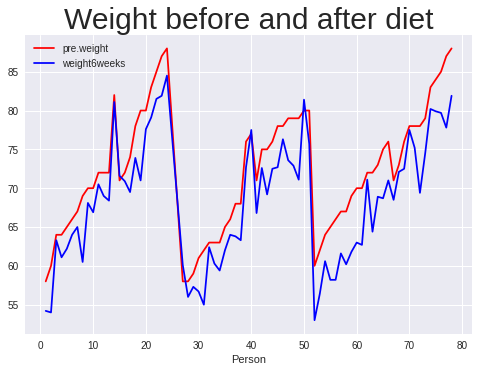

In [294]:
# biểu đồ cân nặng trước khi giảm cân
plt.figure(figsize=(16, 16))
plt.style.use('seaborn')
new_data[['pre.weight', 'weight6weeks']].plot(color= ['red', 'b'])
plt.title('Weight before and after diet', fontsize=30)

# **Task 3: Summary statistics by diet**

In [295]:
# Tọa data mới với cột 'Diet' và 'weightLOST'  
new_data_3 = new_data[['Diet', 'weightLOST']]
new_data_3

,Diet,weightLOST
Person,,
1,1,3.8
2,1,6.0
3,1,0.7
4,1,2.9
5,1,2.8
...,...,...
74,3,2.8
75,3,4.1
76,3,5.3


In [296]:
# Phân loại theo cột 'Diet'     
diet = new_data_3.groupby('Diet').groups
diet

{1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 2: [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], 3: [52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]}

In [297]:
# tạo bảng mới theo cột 'Diet' dựa vào việc phân loại các giá trị của cột 
diet_type_1 = weightLOST[diet[1]]
diet_type_2 = weightLOST[diet[2]]
diet_type_3 = weightLOST[diet[3]]

In [298]:
# mẫu thử với cột 'Diet" lấy giá trị = 11
diet_type_1

Person
1     3.8
2     6.0
3     0.7
4     2.9
5     2.8
6     2.0
7     2.0
8     8.5
9     1.9
10    3.1
11    1.5
12    3.0
13    3.6
14    0.9
15   -0.6
16    1.1
17    4.5
18    4.1
19    9.0
20    2.4
21    3.9
22    3.5
23    5.1
24    3.5
dtype: float64

**Thông kê đơn giản với 3 phương pháp ăn kiêng bằng hàm describle**

In [299]:
diet_type_1.describe()

count    24.000000
mean      3.300000
std       2.240148
min      -0.600000
25%       1.975000
50%       3.050000
75%       3.950000
max       9.000000
dtype: float64

In [300]:
diet_type_2.describe()

count    25.000000
mean      3.268000
std       2.464535
min      -2.100000
25%       2.000000
50%       3.500000
75%       4.700000
max       7.900000
dtype: float64

In [301]:
diet_type_3.describe()

count    27.000000
mean      5.148148
std       2.395568
min       0.500000
25%       3.450000
50%       5.400000
75%       7.000000
max       9.200000
dtype: float64

## **Task 4:**

**4.1: Which diet was best for losing weight?**

*Xây dựng giả thiết:*

*  $H_0: \mu_1 = \mu_2 = \mu_3$

*  $H_1: \mu_i \neq \mu_j$ (i $\neq$ j , i, j $\in \overline{1,3}$)

In [302]:
def shapirotest_and_paint(samples):
    # Kiểm tra  phân phối chuẩn của diet_type_? (loại ?) 
    from scipy.stats import shapiro
    statistics_diet, pvalue_diet = shapiro(samples)
    print('statistics = ',statistics_diet)
    print('pvalue = ',pvalue_diet)
    if pvalue_diet > .05:
        print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
        print('Đủ điều kiện để phân tích tiếp')
    else:
        print('Dữ liệu không tuân theo luật phân phối chuẩn')
    print('thống kê ')
    # ddof=1 : hiệu chỉnh
    plt.plot(np.linspace(np.min(samples), np.max(samples)), 
            stats.norm.pdf(np.linspace(np.min(samples), np.max(samples)), 
                            np.mean(samples), 
                            np.std(samples, ddof=1)))
    # density=True : chuẩn hóa dữ liệu về normal
    plt.hist(samples, color='c', edgecolor='red', density=True)
    plt.title(str(samples), fontsize=30)
    plt.show()

statistics =  0.9255314469337463
pvalue =  0.07748671621084213
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
thống kê 


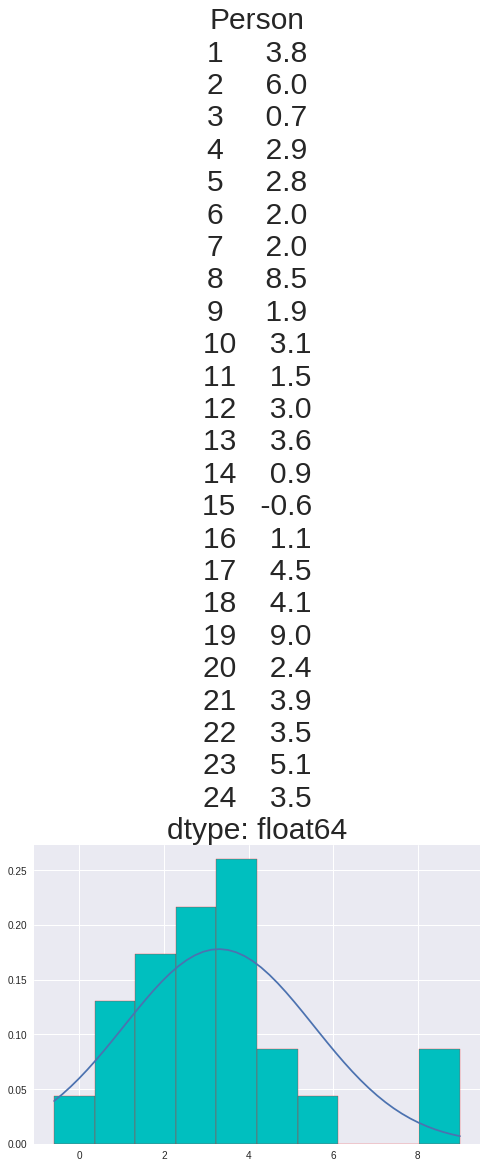

In [303]:
shapirotest_and_paint(diet_type_1)

statistics =  0.9793620705604553
pvalue =  0.8721737861633301
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
thống kê 


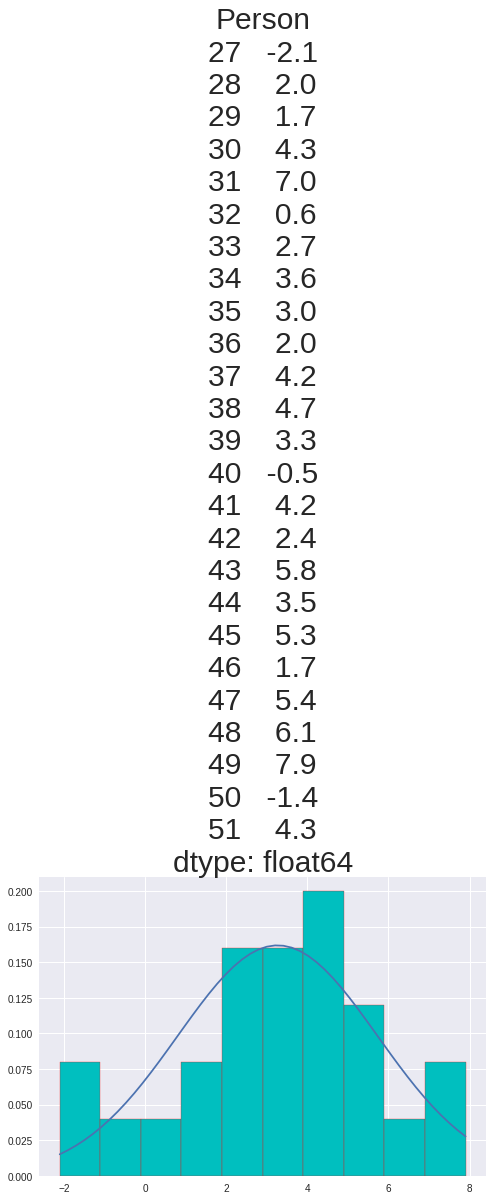

In [304]:
shapirotest_and_paint(diet_type_2)

statistics =  0.9601252675056458
pvalue =  0.37203603982925415
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
thống kê 


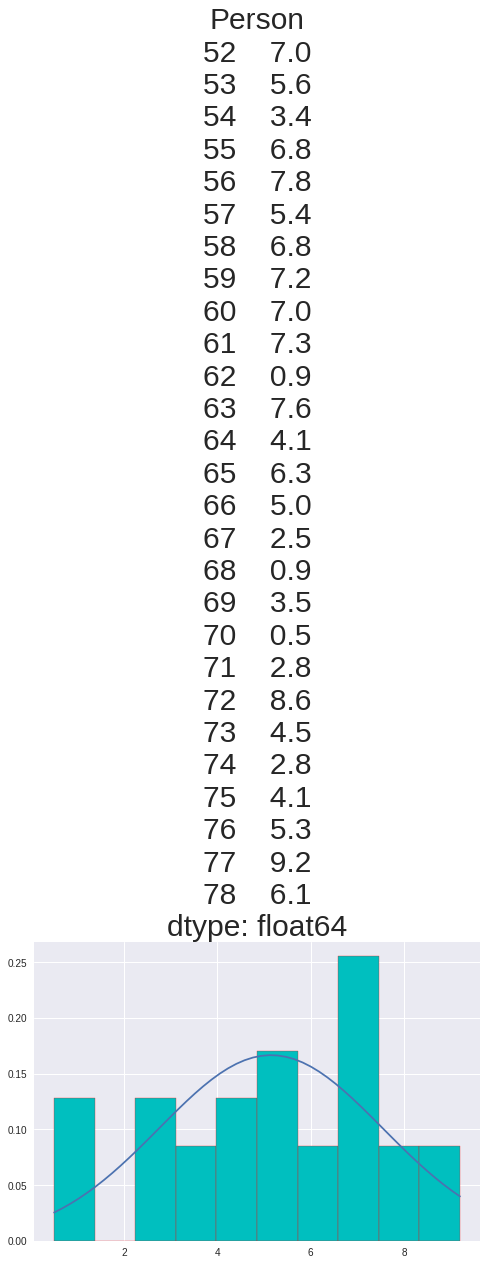

In [305]:
shapirotest_and_paint(diet_type_3)

**Kiểm định tính thuần nhất phương sai (homogeneity of variance)**

**Bartlett’s Test**

Phát biểu các giả thiết:

*  $H_0$: Các thuộc tính đều có phương sai đồng nhất.

*  $H_1$: Có ít nhất 2 thuộc tính có phương sai khác nhau (lớn).

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các thuộc tính không đồng nhất về phương sai.

In [306]:
# kiểm định phương sai(bartlett)  
from scipy.stats import bartlett
statistics_bartlett, pvalue_bartlett = bartlett(diet_type_1, diet_type_2, diet_type_3)
print(statistics_bartlett, pvalue_bartlett)
if pvalue_bartlett > .05:
    print('Không thể bác bỏ giả thiết H0. Các thuộc tính đồng nhất về phương sai')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Các thuộc tính không đồng nhất về phương sai')

0.21811133918795061 0.8966804982694925
Không thể bác bỏ giả thiết H0. Các thuộc tính đồng nhất về phương sai
Đủ điều kiện đê phân tích ANOVA


**Phân tích ANOVA**

In [307]:
# phân tích ANOVA 1 chiều
from scipy.stats import f_oneway
statistics_diet_2 , pvalue_diet_2 = f_oneway(diet_type_1, diet_type_2, diet_type_3)
print('statistics = ',statistics_diet_2)
print('pvalue = ',pvalue_diet_2)
if pvalue_diet_2 > .05:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không có sự khác biệt.')
else:
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt')

statistics =  5.383104474859926
pvalue =  0.006595853108669741
Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt


In [308]:
# bảng ANOVA  
import statsmodels.api as sm
from statsmodels.formula.api import ols

table = sm.stats.anova_lm(
    ols('weightLOST ~ C(Diet)', data=new_data).fit(), 
    typ=2)
table

,sum_sq,df,F,PR(>F)
C(Diet),60.527008,2.0,5.383104,0.006596
Residual,410.401807,73.0,NaN,NaN


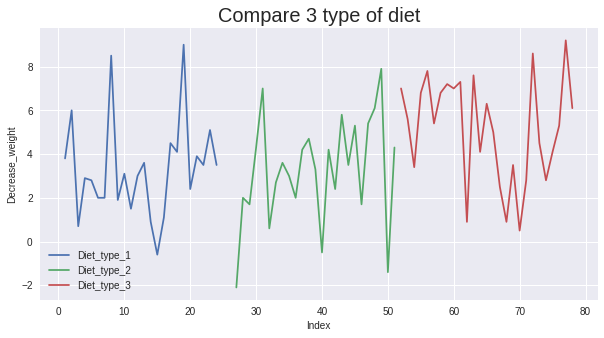

In [309]:
# hiệu quả của 3 cách ăn kiêng  
plt.figure(figsize=(10, 5))
plt.plot(diet_type_1)
plt.plot(diet_type_2)
plt.plot(diet_type_3)
plt.title("Compare 3 type of diet", fontsize=20)
plt.xlabel("Index", fontsize=10)
plt.ylabel("Decrease_weight", fontsize=10)
plt.legend(["Diet_type_1", "Diet_type_2", "Diet_type_3"])
plt.show()

In [310]:
# tạo data mới dựa trên cột 'diet' phân loại (1,2,3) đã trình bày ở trên 
data_diet = pd.DataFrame({'Type_1': diet_type_1, 
                   'Type_2': diet_type_2, 
                   'Type_3': diet_type_3})
data_diet

,Type_1,Type_2,Type_3
Person,,,
1,3.8,NaN,NaN
2,6.0,NaN,NaN
3,0.7,NaN,NaN
4,2.9,NaN,NaN
5,2.8,NaN,NaN
...,...,...,...
74,NaN,NaN,2.8
75,NaN,NaN,4.1
76,NaN,NaN,5.3


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


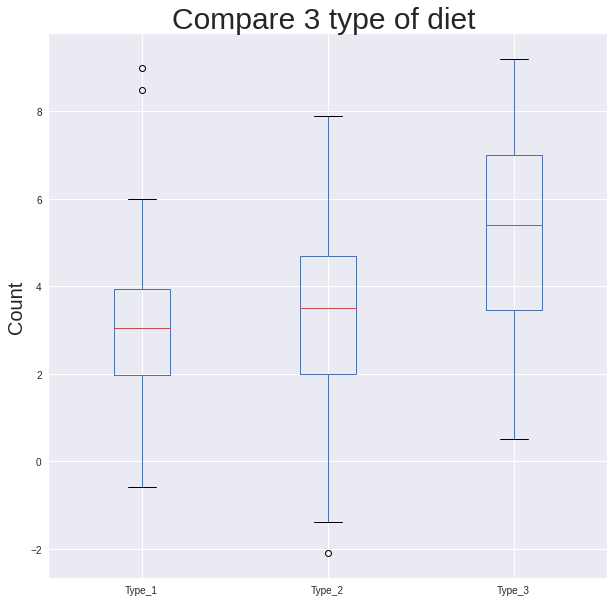

In [311]:
# Vẽ boxplot cho 3 phương pháp ăn kiêng 
plt.figure(figsize=(10, 10))
plt.title('Compare 3 type of diet ', fontsize=30)
data_diet.boxplot()
plt.ylabel('Count', fontsize=20)
plt.show()

**Kiểm định hậu ANOVA (Phân tích sâu ANOVA)**
(tức là kiểm tra hiệu quả giữa các phương pháp ăn kiêng và xem thử phương pháp nào cho hiệu quả tốt nhất)

**Phát biểu giả thiết:**


> Xét hiệu quả giữa phương pháp 1 và 2:



*   $H_0$: Phương pháp 1 và 2 cho hiệu quả tương đương
*   $H_1$: Một trong 2 phương pháp cho hiệu quả tốt hơn


> Xét hiệu quả giữa phương pháp 1 và 3:



*   $H_0$: Phương pháp 1 và 3 cho hiệu quả tương đương
*   $H_1$: Một trong 2 phương pháp cho hiệu quả tốt hơn


> Xét hiệu quả giữa phương pháp 2 và 3:



*   $H_0$: Phương pháp 2 và 3 cho hiệu quả tương đương
*   $H_1$: Một trong 2 phương pháp cho hiệu quả tốt hơn


In [312]:
pip install -U scikit_posthocs

Requirement already up-to-date: scikit_posthocs in /usr/local/lib/python3.7/dist-packages (0.6.7)


In [313]:
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

anova = sa.stats.anova_lm(sfa.ols('weightLOST ~ C(Diet)', 
                                  data=new_data).fit())
print(anova)

            df      sum_sq    mean_sq         F    PR(>F)
C(Diet)    2.0   60.527008  30.263504  5.383104  0.006596
Residual  73.0  410.401807   5.621943       NaN       NaN


In [314]:
# bảng p value của kiểm định anova trong việc tìm ra phương pháp tốt nhất trong 3 phương pháp   
sp.posthoc_ttest(new_data, val_col='weightLOST', group_col='Diet', p_adjust='holm')

,1,2,3
1,1.000000,0.962316,0.019933
2,0.962316,1.000000,0.019933
3,0.019933,0.019933,1.000000


**Nhận xét:**
* $p_{12} = 0.9623$ > 0.05 $\Rightarrow$ Có đủ bằng chứng để bác bỏ giả thuyết H1. Điều này ngụ ý rằng phương pháp 1 và 2 cho hiệu quả tương đương nhau
* $p_{13} = 0.0199$ < 0.05 $\Rightarrow$ Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng một trong 2 phương pháp cho hiệu quả tốt hơn
* $p_{23} = 0.0199$ < 0.05 $\Rightarrow$ Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng một trong 2 phương pháp cho hiệu quả tốt hơn

# **Kiểm tra xem phương pháp 1, 2 hay phương pháp 3 cho hiệu quả tốt hơn** 

In [315]:
# phạm vi độ lệch chuẩn 
def range_std(diet_type):
    min_ = abs(diet_type).min()
    max_ = diet_type.max()
    print('min = ',min_)
    print('max = ',max_)
    print('Range: ',max_-min_)
    return(max_-min_)

In [316]:
range_std(diet_type_1)

min =  0.5999999999999943
max =  9.0
Range:  8.400000000000006


8.400000000000006

In [317]:
range_std(diet_type_2)

min =  0.5
max =  7.900000000000006
Range:  7.400000000000006


7.400000000000006

In [318]:
range_std(diet_type_3)

min =  0.5
max =  9.200000000000003
Range:  8.700000000000003


8.700000000000003

In [319]:
Range = [range_std(diet_type_1),
         range_std(diet_type_2),
         range_std(diet_type_3)]
Std = [diet_type_1.std(), diet_type_2.std(), diet_type_3.std()]
Name = ['1', '2', '3']
table = list(zip(Name, Range, Std))
table = pd.DataFrame(table)
table.columns = ['Type', 'Range', 'Std']
table

min =  0.5999999999999943
max =  9.0
Range:  8.400000000000006
min =  0.5
max =  7.900000000000006
Range:  7.400000000000006
min =  0.5
max =  9.200000000000003
Range:  8.700000000000003


,Type,Range,Std
0,1,8.4,2.240148
1,2,7.4,2.464535
2,3,8.7,2.395568


**4.2: Are there gender differences for weight lost?**
> Xây dựng giả thuyết
* $H_0:$ năng lực giảm cân phụ thuộc vào giới tính
* $H_0:$ năng lực giảm cân không phụ thuộc vào giới tính

In [320]:
# tạo data mới gồm cột giới tính và thay đổi cân nặng 
new_data_4 = new_data[['gender', 'weightLOST']]
new_data_4

,gender,weightLOST
Person,,
1,0,3.8
2,0,6.0
3,0,0.7
4,0,2.9
5,0,2.8
...,...,...
74,1,2.8
75,1,4.1
76,1,5.3


In [321]:
# phân loại theo cột "gender" 
group_4 = new_data_4.groupby('gender').groups
group_4

{'0': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], '1': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]}

In [322]:
gender_0 = weightLOST[gr42['0']] # các phần tử giới tính = 0
gender_1 = weightLOST[gr42['1']] # các phần tử giới tính = 1

**Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa**
**Sử dụng Shapiro-Wilk test**
> Phát biểu giả thiết:
*  $H_0$: Phân phối của thuộc tính là chuẩn
*  $H_1$: Phân phối của thuộc tính là không chuẩn

statistics =  0.9695613384246826
pvalue =  0.3053559362888336
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
thống kê 


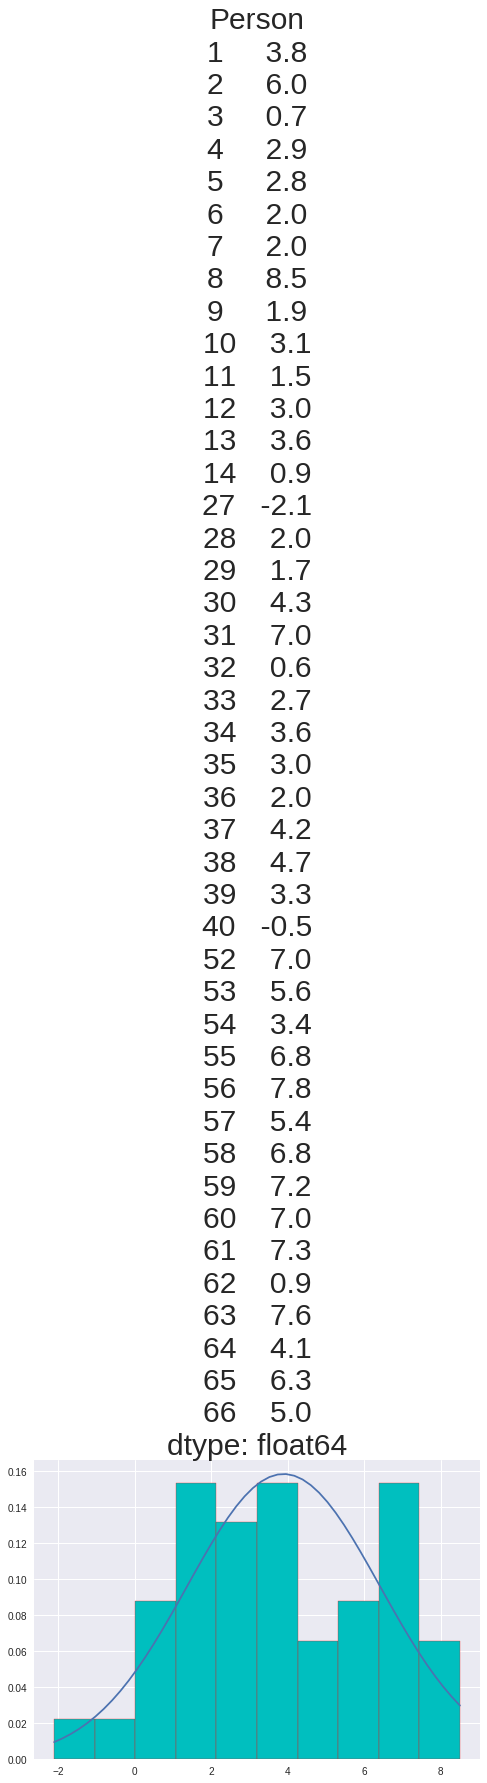

In [323]:
# kiểm định độ lệch chuẩn và vẽ biểu đồ cho gender 0 
shapirotest_and_paint(gender_0)

statistics =  0.9752910137176514
pvalue =  0.6382929682731628
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
thống kê 


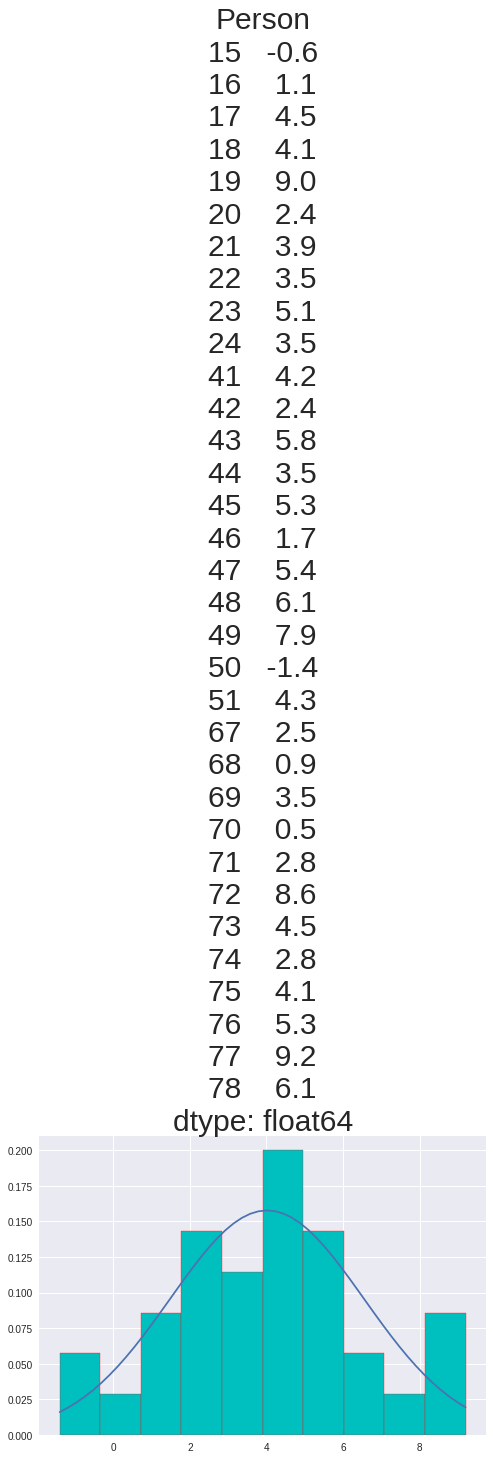

In [324]:
# kiểm định độ lệch chuẩn và vẽ biểu đồ cho gender 1  
shapirotest_and_paint(gender_1)

**Kiểm định tính thuần nhất phương sai (homogeneity of variance)**
**Bartlett’s Test**
> Phát biểu các giả thiết:
* $H_0$: Các thuộc tính đều có phương sai đồng nhất
* $H_1$: Có ít nhất 2 thuộc tính có phương sai khác nhau (lớn)

> Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các thuộc tính không đồng nhất về phương sai.



In [325]:
from scipy.stats import bartlett
statistics_gender, pvalue_gender = bartlett(gender_0, gender_1)                           
print('statistics = ',statistics_gender)
print('pvalue = ',statistics_gender)
if pvalue_gender > .05:
    print('Không thể bác bỏ giả thiết H0. Các thuộc tính đồng nhất về phương sai')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Các thuộc tính không đồng nhất về phương sai')

statistics =  0.0010952221531771032
pvalue =  0.0010952221531771032
Không thể bác bỏ giả thiết H0. Các thuộc tính đồng nhất về phương sai
Đủ điều kiện đê phân tích ANOVA


**Phân tích ANOVA**

In [326]:
from scipy.stats import f_oneway
statistics_gen , pvalue_gen = f_oneway(gender_0, gender_1)
print('statistics = ',statistics_gen)
print('pvalue = ',pvalue_gen)
if pvalue_gen > .05:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không ảnh hưởng bởi giới tính.')
else:
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có ảnh hưởng bởi giới tính')

statistics =  0.04378592096006073
pvalue =  0.8348273886348012
Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không ảnh hưởng bởi giới tính.


# **Task 5: Effect of diet and gender on weight lost**
> Giả thuyết:
* $H_0$: Hiệu quả giảm cân của nam và nữ là như nhau.
* $H_1$: Hiệu quả giảm cân của nam và nữ là khác nhau.

In [327]:
# alpa = .05, sự khác biệt của việc giảm cân khi đổi với từng giới tính 
# nguồn thầy hạnh 
def results(p, vals=['mean1', 'mean2'], alpha=.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

from scipy.stats import ttest_1samp

p = {}
p['mean1'] = np.mean(gender_0)
p['mean2'] = np.mean(gender_1)
p['score'], p['p_value'] = ttest_1samp(gender_0, p['mean2'])
results(p)

,mean1,mean2,score,p_value,KetLuan
,3.893023,4.015152,-0.318316,0.751823,Chấp nhận H0 với mức ý nghĩa 0.05


# **Task 6: Means plot of weight lost by diet and gender**

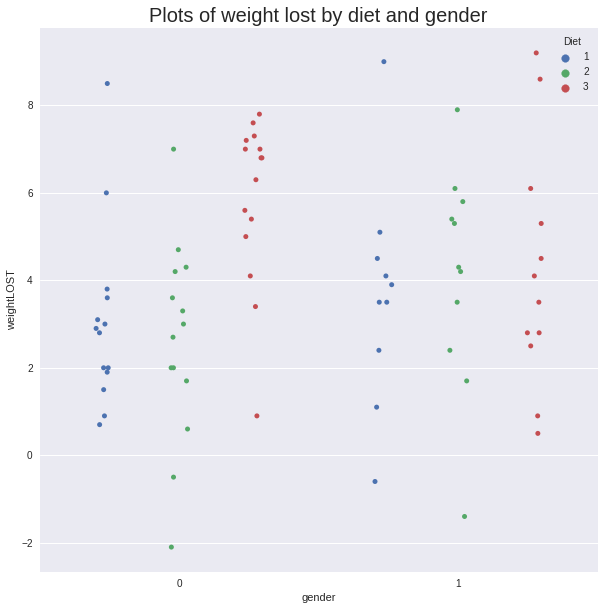

In [328]:
plt.figure(figsize=(10, 10))
plt.title('Plots of weight lost by diet and gender', fontsize= 20)
sns.color_palette('bright')
sns.stripplot(x='gender', 
              y='weightLOST', 
              data=new_data, 
              jitter=True, 
              hue='Diet', 
              dodge=True)
plt.show()

## **Task 7: Add height to either ANOVA**

In [329]:
new_data_7 = new_data[['Height', 'gender', 'Diet', 'weightLOST']]
new_data_7

,Height,gender,Diet,weightLOST
Person,,,,
1,159,0,1,3.8
2,192,0,1,6.0
3,170,0,1,0.7
4,171,0,1,2.9
5,170,0,1,2.8
...,...,...,...,...
74,183,1,3,2.8
75,177,1,3,4.1
76,164,1,3,5.3


In [330]:
pip install -U pingouin

Requirement already up-to-date: pingouin in /usr/local/lib/python3.7/dist-packages (0.3.12)


In [331]:
from pingouin import ancova

# bảng ANCOVA  
ancova(data=new_data_7, dv='weightLOST', covar='Height', between='Diet')

,Source,SS,DF,F,p-unc,np2
0,Diet,54.939344,2,4.824629,0.010807,0.118179
1,Height,0.460119,1,0.080813,0.777015,0.001121
2,Residual,409.941688,72,NaN,NaN,NaN
